In [411]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the Dataset

In [412]:
df = pd.read_csv('final_car_dekho.csv')

##### Finding the size of dataset

In [413]:
df.shape

(4843, 9)

we have 4843 rows and 9 columns

In [414]:
df.head(10)

,Unnamed: 0,Car Brand,Make year,Fuel Type,No of Owners,Transmission Type,Driven KMS,Location,Car Price
0,0,2017 Maruti Baleno,2017.0,Petrol,1st Owner,Manual,"73,650 Kms",Hyderabad,"5,94,000"
1,1,2017 Maruti Baleno,2017.0,Petrol,1st Owner,Manual,"32,415 Kms",Hyderabad,"5,89,000"
2,2,2018 Jeep Compass,2018.0,Petrol,1st Owner,Manual,"15,746 Kms",Hyderabad,"14,55,000"
3,3,2015 Hyundai Grand i10,2015.0,Petrol,1st Owner,Manual,"32,540 Kms",Hyderabad,"4,45,000"
4,4,2016 Honda City,2016.0,Petrol,1st Owner,Manual,"31,818 Kms",Hyderabad,"7,30,000"
5,5,2017 Maruti Wagon R,2017.0,Petrol,1st Owner,Manual,"47,777 Kms",Hyderabad,"4,18,000"
6,6,2017 Hyundai Grand i10,2017.0,Petrol,1st Owner,Manual,"36,089 Kms",Hyderabad,"5,20,000"
7,7,2017 Maruti Wagon R,2017.0,Petrol,1st Owner,Manual,"63,004 Kms",Hyderabad,"4,35,000"
8,8,2016 Maruti Swift,2016.0,Petrol,1st Owner,Manual,"51,681 Kms",Hyderabad,"5,71,000"
9,9,2015 Maruti Swift Dzire,2015.0,Petrol,1st Owner,Manual,"67,698 Kms",Hyderabad,"5,30,000"


### DataPreprocessing

##### As we have one unnamed column in dataset deleted it

In [415]:
df.drop('Unnamed: 0',inplace=True, axis=1)

In [416]:
df

,Car Brand,Make year,Fuel Type,No of Owners,Transmission Type,Driven KMS,Location,Car Price
0,2017 Maruti Baleno,2017.0,Petrol,1st Owner,Manual,"73,650 Kms",Hyderabad,"5,94,000"
1,2017 Maruti Baleno,2017.0,Petrol,1st Owner,Manual,"32,415 Kms",Hyderabad,"5,89,000"
2,2018 Jeep Compass,2018.0,Petrol,1st Owner,Manual,"15,746 Kms",Hyderabad,"14,55,000"
3,2015 Hyundai Grand i10,2015.0,Petrol,1st Owner,Manual,"32,540 Kms",Hyderabad,"4,45,000"
4,2016 Honda City,2016.0,Petrol,1st Owner,Manual,"31,818 Kms",Hyderabad,"7,30,000"
...,...,...,...,...,...,...,...,...
4838,Ford Fiesta 1.4 Zxi Tdci Abs,NaN,Diesel,Second Owner,Manual,"90,000 Kms",Chennai,2.10 Lakh*
4839,Ford Figo Diesel Lxi,2013.0,Diesel,First Owner,Manual,"55,787 Kms",Chennai,2.70 Lakh*
4840,Ford Figo Diesel Lxi,2012.0,Diesel,First Owner,Manual,"74,818 Kms",Chennai,2.70 Lakh*
4841,Chevrolet Sail 1.2 Ls Abs,2013.0,Petrol,First Owner,Manual,"73,000 Kms",Chennai,1.90 Lakh*


##### Finding any NaN values present in dataframe

In [417]:
df.isnull().sum()

Car Brand             23
Make year            400
Fuel Type             23
No of Owners          23
Transmission Type     23
Driven KMS            23
Location               0
Car Price             23
dtype: int64

##### Getting all null values indexes

In [418]:
nan_indexes = df[df['Car Brand'].isnull()].index.tolist()

##### Dropping All null values by using their indexes

In [419]:
df.drop(nan_indexes,inplace=True, axis=0)

In [420]:
df.isnull().sum() 

Car Brand              0
Make year            377
Fuel Type              0
No of Owners           0
Transmission Type      0
Driven KMS             0
Location               0
Car Price              0
dtype: int64

Now no null values are present in Dataframe except make year

##### At some rows of column Car name we have car make in it so removing it

In [421]:
dts = ['2017 ', '2018 ', '2015 ', '2016 ', '2021 ', '2010 ', '2009 ', '2019 ', '2014 ','2020 ', '2012 ', '2013 ', '2011 ', '2008 ', '2006 ', '2022 ', '2003 ','2007 ', '2005 ', '2002 ', '2004 ']
for i in dts:
    df['Car Brand'] = df['Car Brand'].map(lambda x: x.lstrip(i))
    
    

<AxesSubplot:>

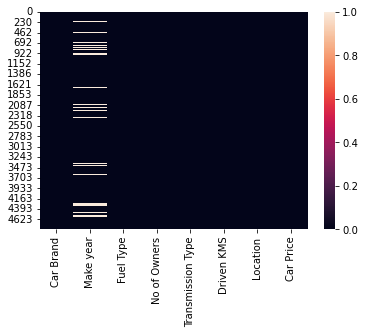

In [422]:
sns.heatmap(df.isnull())

##### we have Null values in make year,Need to handle

##### make year is of float Type 
#### using ffill to handle the missing values as we have 400+ rows we cannot drop them

In [423]:
df['Make year'].dtype

dtype('float64')

In [424]:
df.fillna(method='ffill',inplace=True)

<AxesSubplot:>

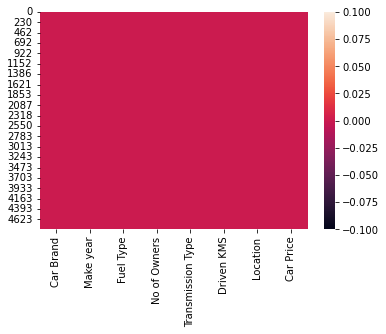

In [425]:
sns.heatmap(df.isnull())

- Now there are no null values in DF

In [426]:
df['Make year'] = df['Make year'].astype(str)

In [427]:
df['Make year'] = df['Make year'].map(lambda x: x.rstrip('.0'))

In [428]:
df

,Car Brand,Make year,Fuel Type,No of Owners,Transmission Type,Driven KMS,Location,Car Price
0,Maruti Baleno,2017,Petrol,1st Owner,Manual,"73,650 Kms",Hyderabad,"5,94,000"
1,Maruti Baleno,2017,Petrol,1st Owner,Manual,"32,415 Kms",Hyderabad,"5,89,000"
2,Jeep Compass,2018,Petrol,1st Owner,Manual,"15,746 Kms",Hyderabad,"14,55,000"
3,Hyundai Grand i10,2015,Petrol,1st Owner,Manual,"32,540 Kms",Hyderabad,"4,45,000"
4,Honda City,2016,Petrol,1st Owner,Manual,"31,818 Kms",Hyderabad,"7,30,000"
...,...,...,...,...,...,...,...,...
4838,Ford Fiesta 1.4 Zxi Tdci Abs,2016,Diesel,Second Owner,Manual,"90,000 Kms",Chennai,2.10 Lakh*
4839,Ford Figo Diesel Lxi,2013,Diesel,First Owner,Manual,"55,787 Kms",Chennai,2.70 Lakh*
4840,Ford Figo Diesel Lxi,2012,Diesel,First Owner,Manual,"74,818 Kms",Chennai,2.70 Lakh*
4841,Chevrolet Sail 1.2 Ls Abs,2013,Petrol,First Owner,Manual,"73,000 Kms",Chennai,1.90 Lakh*


#### Preprocessing Car Brand feature

In [429]:
df['Car_Brand'] = df['Car Brand'].str.split(' ').str.get(0)
df['Car_Model'] = df['Car Brand'].str.split(' ').str[1:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')
df.drop(columns = 'Car Brand', inplace = True)

##### Preprocessing Driven KMS feature

In [430]:
df['Driven KMS'] = df['Driven KMS'].map(lambda x: x.rstrip(' Kms'))
df['Driven KMS'] = df['Driven KMS'].str.replace(',', '')
df['Driven KMS'] = df['Driven KMS'].astype(int)

In [431]:
df.dtypes

Make year            object
Fuel Type            object
No of Owners         object
Transmission Type    object
Driven KMS            int64
Location             object
Car Price            object
Car_Brand            object
Car_Model            object
dtype: object

##### Preprocessing No of Owners columns interpreting values

In [432]:
df['No of Owners'] = df['No of Owners'].map({'1st Owner': 1, 'First Owner':1, '2nd Owner':2, '3rd Owner':3, 'Third Owner':3,'Second Owner':2,'Fourth Owner':4,'Fifth Owner':5,'Unregistered Car Owner':0})
df['Make year'] = df['Make year'].map({'201':'2021','202':'2022','2002':'2002','2003':'2003','2004':'2004','2005':'2005','2006':'2006','2007':'2007','2008':'2008','2009':'2009','2010':'2010','2011':'2011','2012':'2012','2013':'2013','2014':'2014','2015':'2015','2016':'2016','2017':'2017','2018':'2018','2019':'2019','2020':'2020','2021':'2021','2022':'2022'})



In [433]:
df['No of Owners'].unique()

array([1, 2, 3, 4, 5, 0])

##### Preprocessing No of Owners columns interpreting values

In [434]:
df['Transmission Type'].unique()

array(['Manual', 'Automatic', 'TS08', 'KA41', 'KA01', 'KA05', 'KA03',
       'KA04', 'KA02', 'MH43', 'MH48', 'MH03', 'MH01', 'MH04'],
      dtype=object)

In [435]:
df['Transmission Type'].value_counts()

Manual       3527
Automatic    1280
MH01            2
TS08            1
KA41            1
KA01            1
KA05            1
KA03            1
KA04            1
KA02            1
MH43            1
MH48            1
MH03            1
MH04            1
Name: Transmission Type, dtype: int64

In [436]:
othrs = ['TS08', 'KA41', 'KA01', 'KA05', 'KA03','KA04', 'KA02', 'MH43', 'MH48', 'MH03', 'MH01', 'MH04']
for i in othrs:
    df.drop(df.index[df['Transmission Type'] == i], inplace=True)

In [437]:
df['Transmission Type'].value_counts()

Manual       3527
Automatic    1280
Name: Transmission Type, dtype: int64

In [438]:
df['Make year'].unique()

array(['2017', '2018', '2015', '2016', '2021', '2009', '2019', '2014',
       '2022', '2012', '2013', '2011', '2008', '2006', '2003', '2007',
       '2005', '2002', '2004'], dtype=object)

##### Preprocessing Car Price columns interpreting values

In [439]:
df['Car Price'].unique()

array(['5,94,000', '5,89,000', '14,55,000', ..., '6.69 Lakh*',
       '9.67 Lakh*', '9.73 Lakh*'], dtype=object)

In [440]:
df['Car Price'] = df['Car Price'].map(lambda x: x.replace('Lakh*','000'))
df['Car Price'] = df['Car Price'].map(lambda x: x.replace('Crore*','00000'))
df['Car Price'] = df['Car Price'].str.replace(',', '')
df['Car Price'] = df['Car Price'].str.replace('.', '')
df['Car Price'] = df['Car Price'].str.replace(' ', '')
df['Car Price'] = df['Car Price'].str.replace('*', '')
df['Car Price'] = df['Car Price'].astype(int)

/var/folders/0y/6vqz_hlj1t13llqtxyrlx3rh0000gn/T/ipykernel_927/399701250.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Car Price'] = df['Car Price'].str.replace('.', '')
/var/folders/0y/6vqz_hlj1t13llqtxyrlx3rh0000gn/T/ipykernel_927/399701250.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Car Price'] = df['Car Price'].str.replace('*', '')


In [441]:
df['Car Price'].unique()

array([  594000,   589000,  1455000,   445000,   730000,   418000,
         520000,   435000,   571000,   530000,   320000,  1433000,
        1696000,  1150000,   270000,   350000,   410000,   450000,
         515000,   453000,   504000,   443000,   600000,   635000,
         510000,   575000,   428000,   430000,  1233000,   810000,
         340000,   380000,  1143000,   513000,  1134000,   524000,
         544000,   555000,  1289000,   439000,   839000,   780000,
        1462000,   700000,   480000,   465000,   703000,   763000,
         850000,   495000,   735000,   751000,   327000,   460000,
         423000,   540000,   574000,   500000,   995000,   813000,
        2141000,   455000,   830000,   620000,   825000,   282000,
         539000,   376000,   470000,   493000,   630000,  1263000,
        2030000,   632000,   405000,   593000,   678000,   413000,
         286000,   531000,   687000,  1189000,  1066000,   365000,
         750000,   355000,   886000,   375000,   650000,   741

In [442]:
df['Car_Brand'].unique()

array(['Maruti', 'Jeep', 'Hyundai', 'Honda', 'Renault', 'Volkswagen',
       'Nissan', 'Mahindra', 'Skoda', 'Tata', 'MG', 'Toyota', 'Datsun',
       'Kia', 'Ford', 'Bmw', 'Audi', 'Porsche', 'Jaguar', 'Land',
       'Mercedes-benz', 'Isuzu', 'Volvo', 'Chevrolet', 'Hindustan',
       'Mini', 'Mg', 'Fiat', 'Mitsubishi', 'Opelcorsa', 'Lexus'],
      dtype=object)

##### Getting all categeorical variable value counts

In [443]:
#checking for categeorical columns
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
print(f"- We have {len(features_list)} features with object type in the dataset")
features_list

- We have 6 features with object type in the dataset


['Make year',
 'Fuel Type',
 'Transmission Type',
 'Location',
 'Car_Brand',
 'Car_Model']

In [444]:
# Lets find the unique values which are present in categeorical columns
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

Make year
2017    672
2016    599
2018    569
2015    480
2014    399
2021    371
2019    361
2013    341
2012    269
2022    265
2011    214
2009    110
2008     90
2007     38
2006     14
2005      8
2003      3
2002      2
2004      2
Name: Make year, dtype: int64
--------------------------------------
Fuel Type
Petrol      2899
Diesel      1851
CNG           38
Electric      10
LPG            9
Name: Fuel Type, dtype: int64
--------------------------------------
Transmission Type
Manual       3527
Automatic    1280
Name: Transmission Type, dtype: int64
--------------------------------------
Location
Bangalore    1667
Mumbai       1168
Chennai      1042
Hyderabad     930
Name: Location, dtype: int64
--------------------------------------
Car_Brand
Maruti           1117
Hyundai          1067
Honda             558
Toyota            276
Mahindra          267
Volkswagen        201
Renault           179
Tata              167
Ford              142
Mercedes-benz     134
Skoda             1

### Visualization

##### Univariate Analysis

In [445]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Make year', 'Fuel Type', 'Transmission Type', 'Location', 'Car_Brand', 'Car_Model']


In [446]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['No of Owners', 'Driven KMS', 'Car Price']


/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Make year', ylabel='count'>

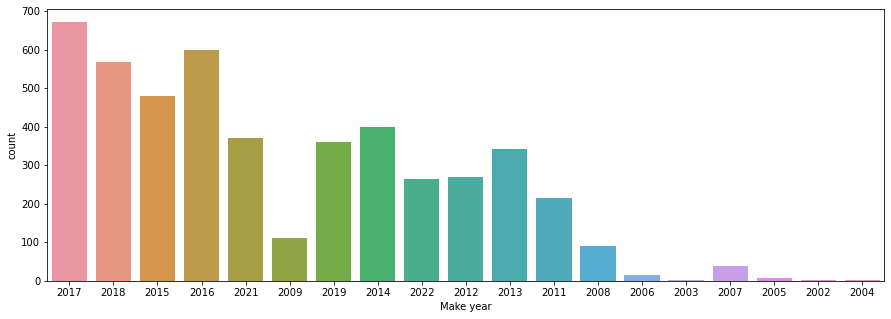

In [447]:
#Univariate Analysis of Make Year
plt.figure(figsize=[15,5])
sns.countplot(df['Make year'])

- 2017 related cars are more in the Dataset
- 2004 related year cars are very less in dataset

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel Type', ylabel='count'>

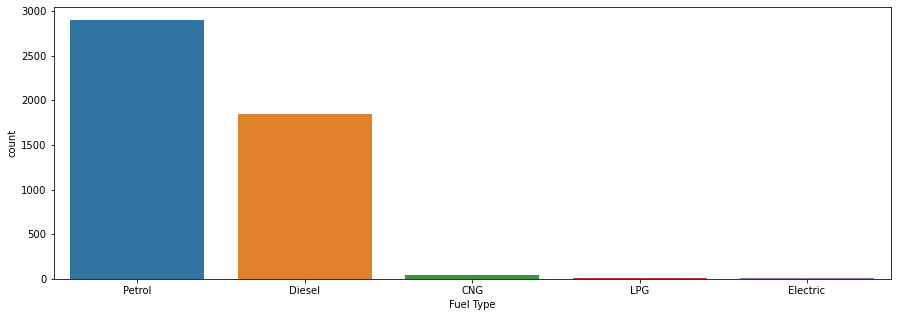

In [448]:
#Univariate Analysis of Fuel Type
plt.figure(figsize=[15,5])
sns.countplot(df['Fuel Type'])

- Petrol related car variants are more in Dataset followed by Diesel,Cng,LPG,Electric

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission Type', ylabel='count'>

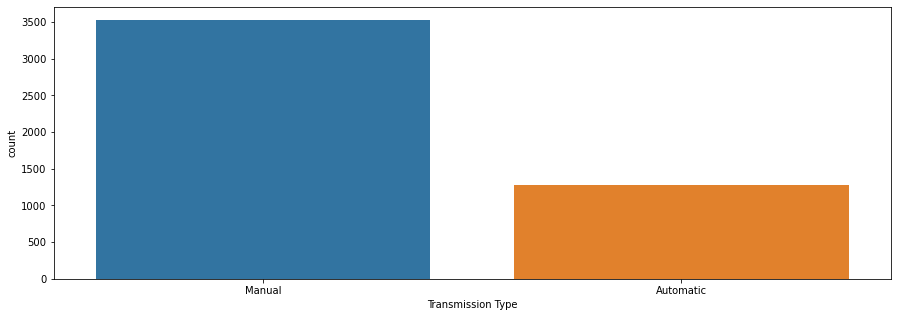

In [449]:
#Univariate Analysis of Transmission Type
plt.figure(figsize=[15,5])
sns.countplot(df['Transmission Type'])

- Manual related transmission type cars are more in teh data set

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

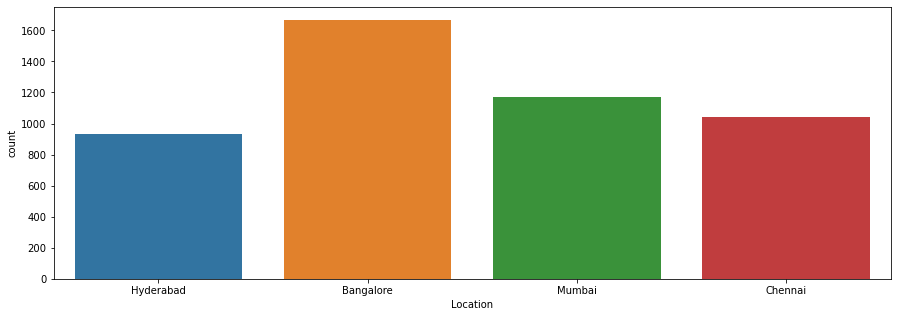

In [450]:
#Univariate Analysis of Location
plt.figure(figsize=[15,5])
sns.countplot(df['Location'])

- Bangalore related Cars are more in Dataset followed by Mumbai,Chennai,Hyderabad

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car_Brand', ylabel='count'>

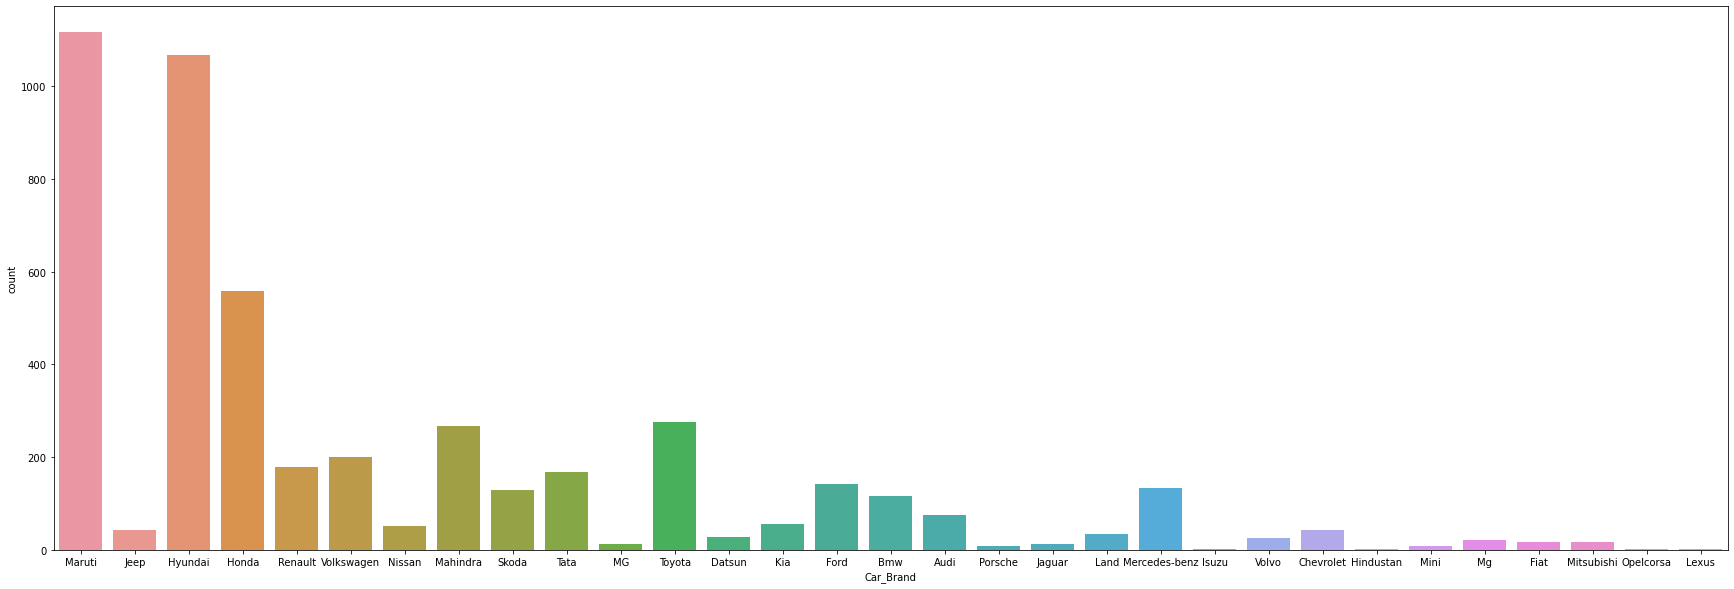

In [451]:
#Univariate Analysis of Car Brand
plt.figure(figsize=[30,10])
sns.countplot(df['Car_Brand'])

- We have lot of models in Dataset so cannot Visualize

In [452]:
df['Car_Brand'].unique()

array(['Maruti', 'Jeep', 'Hyundai', 'Honda', 'Renault', 'Volkswagen',
       'Nissan', 'Mahindra', 'Skoda', 'Tata', 'MG', 'Toyota', 'Datsun',
       'Kia', 'Ford', 'Bmw', 'Audi', 'Porsche', 'Jaguar', 'Land',
       'Mercedes-benz', 'Isuzu', 'Volvo', 'Chevrolet', 'Hindustan',
       'Mini', 'Mg', 'Fiat', 'Mitsubishi', 'Opelcorsa', 'Lexus'],
      dtype=object)

In [453]:
len(df['Car_Model'].unique())

1685

- Toatally we have 1685 car models in the Dataset

##### Bivariate Analysis

Text(0, 0.5, 'Car Price')

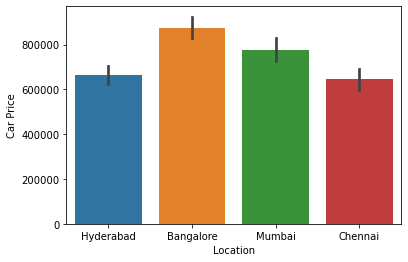

In [454]:
##### Comparing Location and Car Price
sns.barplot(x=df['Location'],y=df['Car Price'])
plt.xlabel('Location')
plt.ylabel('Car Price')

- Bangalore has cars with more than 8 lakhs rupees price
- Mumbai has cars price b/w 7.8 Lakhs to 8 Lakhs
- Hyderabad and Chennai has prices above 6 Lakhs and below 6.5 Lakhs

Text(0, 0.5, 'Car Price')

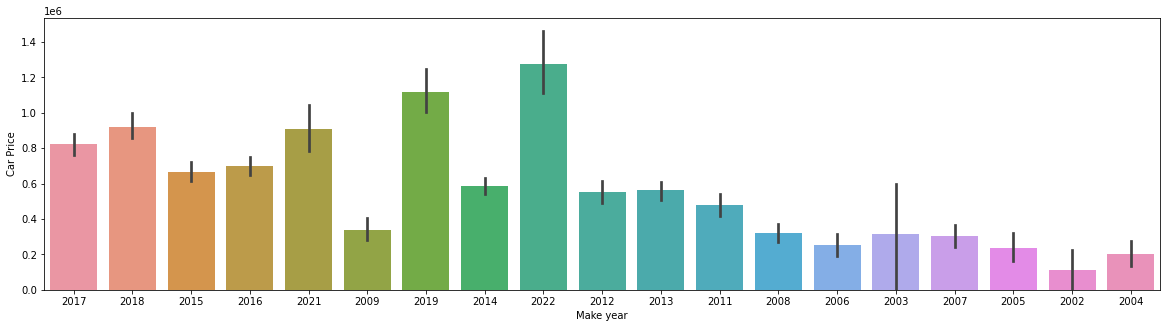

In [455]:
##### Comparing Make year and Car Price
plt.figure(figsize=[20,5])
sns.barplot(x=df['Make year'],y=df['Car Price'])
plt.xlabel('Make year')
plt.ylabel('Car Price')

Text(0, 0.5, 'Car Price')

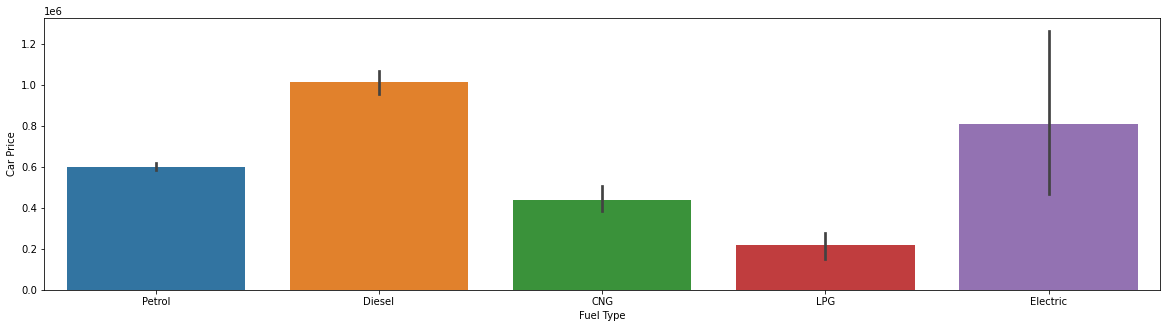

In [456]:
##### Comparing Fuel Type and Car Price
plt.figure(figsize=[20,5])
sns.barplot(x=df['Fuel Type'],y=df['Car Price'])
plt.xlabel('Fuel Type')
plt.ylabel('Car Price')

Text(0, 0.5, 'Car Price')

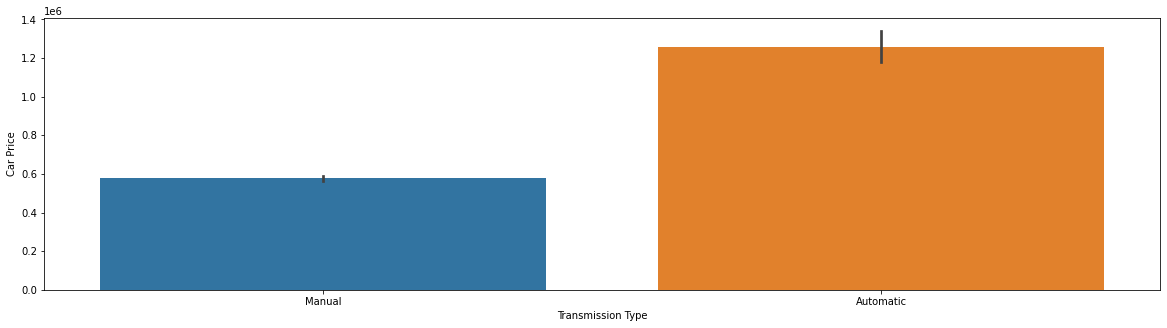

In [457]:
##### Comparing Transmission Type and Car Price
plt.figure(figsize=[20,5])
sns.barplot(x=df['Transmission Type'],y=df['Car Price'])
plt.xlabel('Transmission Type')
plt.ylabel('Car Price')

- For Diesel and Electric cars the price is high compared to Petrol,LPG and CNG.
- Cars with automatic gear are costlier than manual gear cars.
- Most of the Cras with 2021 Manufacturing year has good price.


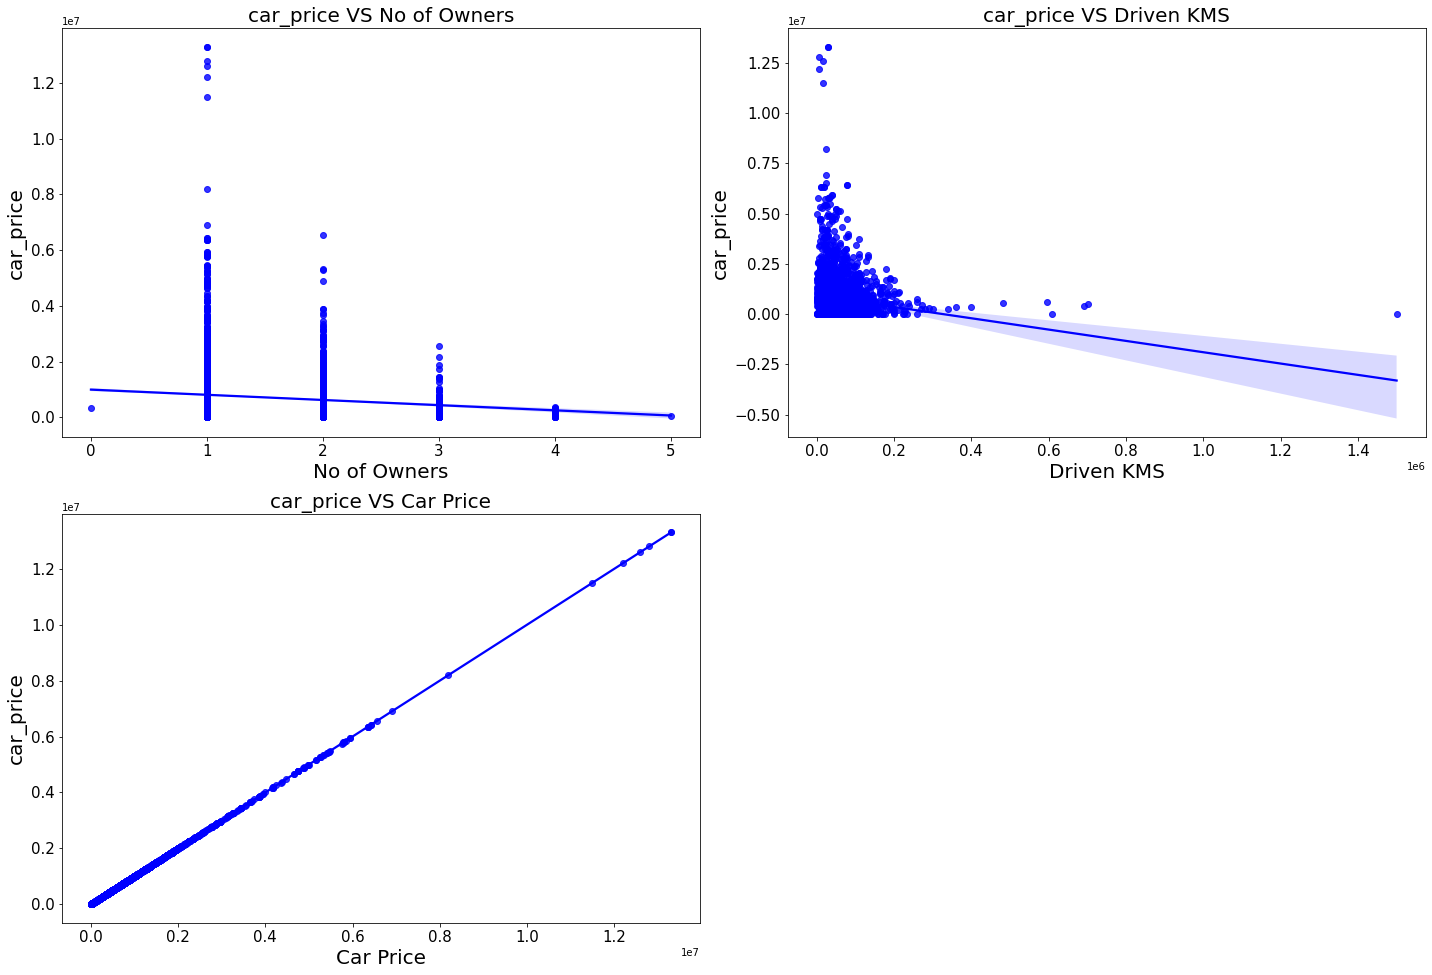

In [458]:
#regplot for numerical columns
plt.figure(figsize=(20,40))
for i in range(len(numerical_columns)):
    plt.subplot(6,2,i+1)
    sns.regplot(x=df[numerical_columns[i]] , y=df['Car Price'],color="b")
    plt.title(f"car_price VS {numerical_columns[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(numerical_columns[i],fontsize = 20)
    plt.ylabel('car_price',fontsize = 20)
    plt.tight_layout()

- We can see as the Number of owners incresing the price is decreasing
- As the driven KMS are less the car price is more

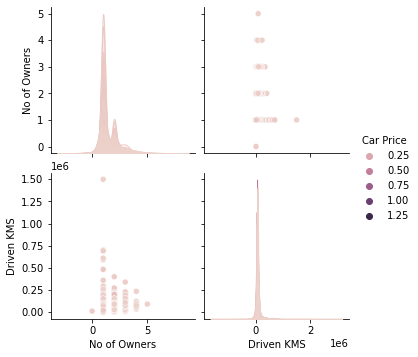

In [459]:
#pair ploting for df
sns.pairplot(df,hue="Car Price")

#### Checking for outliers

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

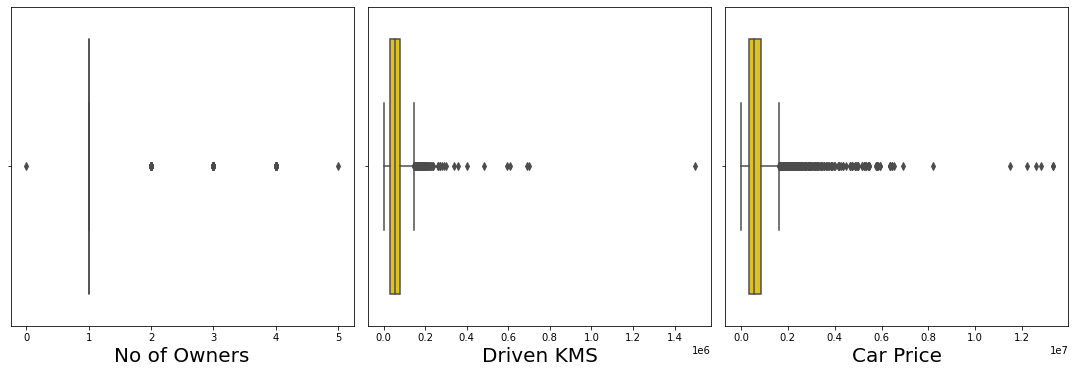

In [460]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- There are outliers in the dataset

##### Removing Outliers using z-score method

In [461]:
from scipy.stats import zscore
z = np.abs(zscore(df[numerical_columns]))
x_score_cl = df[(z<3).all(axis=1)]

In [462]:
x_score_cl.shape

(4504, 9)

In [463]:
print('After removing outliers from data set we have loss of ',((4807-4504)/4807)*100)

After removing outliers from data set we have loss of  6.303307676305388


##### Removing Outliers using IQR method

In [464]:
"""Takes the dataframe and removed the outliers and will return back"""
outlier_index = np.array([])
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3-q1
    col = df[column]
    indx = col[(col > q3+1.5*IQR) | (col < q1-1.5*IQR)].index
    outlier_index = np.append(outlier_index,indx)
outlier_index

array([  27.,   33.,   36., ..., 4703., 4720., 4724.])

In [465]:
df_2 = df.drop(outlier_index)
df_2.shape

(3290, 9)

In [466]:
print('After removing outliers from data set we have loss of ',((4807-3290)/4807)*100)

After removing outliers from data set we have loss of  31.55814437278968


- While using zscore we have dataloss of 6.30%
- While using IQR method we have dataloss of 31.5%
- so continuing with z-score method

In [467]:
dropindx = df.index.difference(x_score_cl.index)
df.drop(dropindx,inplace=True)
df

,Make year,Fuel Type,No of Owners,Transmission Type,Driven KMS,Location,Car Price,Car_Brand,Car_Model
0,2017,Petrol,1,Manual,73650,Hyderabad,594000,Maruti,Baleno
1,2017,Petrol,1,Manual,32415,Hyderabad,589000,Maruti,Baleno
2,2018,Petrol,1,Manual,15746,Hyderabad,1455000,Jeep,Compass
3,2015,Petrol,1,Manual,32540,Hyderabad,445000,Hyundai,Grand i10
4,2016,Petrol,1,Manual,31818,Hyderabad,730000,Honda,City
...,...,...,...,...,...,...,...,...,...
4838,2016,Diesel,2,Manual,90000,Chennai,210000,Ford,Fiesta 1.4 Zxi Tdci Abs
4839,2013,Diesel,1,Manual,55787,Chennai,270000,Ford,Figo Diesel Lxi
4840,2012,Diesel,1,Manual,74818,Chennai,270000,Ford,Figo Diesel Lxi
4841,2013,Petrol,1,Manual,73000,Chennai,190000,Chevrolet,Sail 1.2 Ls Abs


- Some of the outliers are removed from the dataset

#### Checking for skewness in the dataset

In [468]:
df.skew()

/var/folders/0y/6vqz_hlj1t13llqtxyrlx3rh0000gn/T/ipykernel_927/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Make year      -0.377494
No of Owners    1.432435
Driven KMS      0.715294
Car Price       1.800906
dtype: float64

In [469]:
df['Make year'].dtype

dtype('O')

In [470]:
from sklearn.preprocessing import PowerTransformer
#Creating a list of skewed features
sk_feat=['Make year', 'Driven KMS', 'Car Price']
scalar = PowerTransformer(method='yeo-johnson')
df[sk_feat] = scalar.fit_transform(df[sk_feat].values)

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [471]:
df

,Make year,Fuel Type,No of Owners,Transmission Type,Driven KMS,Location,Car Price,Car_Brand,Car_Model
0,0.268540,Petrol,1,Manual,0.630555,Hyderabad,0.030961,Maruti,Baleno
1,0.268540,Petrol,1,Manual,-0.674871,Hyderabad,0.020719,Maruti,Baleno
2,0.577715,Petrol,1,Manual,-1.422347,Hyderabad,1.366015,Jeep,Compass
3,-0.329093,Petrol,1,Manual,-0.670031,Hyderabad,-0.298095,Hyundai,Grand i10
4,-0.033679,Petrol,1,Manual,-0.698102,Hyderabad,0.293006,Honda,City
...,...,...,...,...,...,...,...,...,...
4838,-0.033679,Diesel,2,Manual,1.050356,Chennai,-0.980291,Ford,Fiesta 1.4 Zxi Tdci Abs
4839,-0.900108,Diesel,1,Manual,0.120863,Chennai,-0.776759,Ford,Figo Diesel Lxi
4840,-1.175998,Diesel,1,Manual,0.661842,Chennai,-0.776759,Ford,Figo Diesel Lxi
4841,-0.900108,Petrol,1,Manual,0.613049,Chennai,-1.055241,Chevrolet,Sail 1.2 Ls Abs


In [472]:
df.skew()

/var/folders/0y/6vqz_hlj1t13llqtxyrlx3rh0000gn/T/ipykernel_927/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Make year      -0.151661
No of Owners    1.432435
Driven KMS     -0.050914
Car Price       0.051817
dtype: float64

- Some skewness has been reduced

In [473]:
df

,Make year,Fuel Type,No of Owners,Transmission Type,Driven KMS,Location,Car Price,Car_Brand,Car_Model
0,0.268540,Petrol,1,Manual,0.630555,Hyderabad,0.030961,Maruti,Baleno
1,0.268540,Petrol,1,Manual,-0.674871,Hyderabad,0.020719,Maruti,Baleno
2,0.577715,Petrol,1,Manual,-1.422347,Hyderabad,1.366015,Jeep,Compass
3,-0.329093,Petrol,1,Manual,-0.670031,Hyderabad,-0.298095,Hyundai,Grand i10
4,-0.033679,Petrol,1,Manual,-0.698102,Hyderabad,0.293006,Honda,City
...,...,...,...,...,...,...,...,...,...
4838,-0.033679,Diesel,2,Manual,1.050356,Chennai,-0.980291,Ford,Fiesta 1.4 Zxi Tdci Abs
4839,-0.900108,Diesel,1,Manual,0.120863,Chennai,-0.776759,Ford,Figo Diesel Lxi
4840,-1.175998,Diesel,1,Manual,0.661842,Chennai,-0.776759,Ford,Figo Diesel Lxi
4841,-0.900108,Petrol,1,Manual,0.613049,Chennai,-1.055241,Chevrolet,Sail 1.2 Ls Abs


##### Label Encoding Categeorical columns

In [474]:
from sklearn.preprocessing import LabelEncoder
cat_features = ['Fuel Type','Transmission Type','Location','Car_Brand','Car_Model','No of Owners']
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [475]:
df

,Make year,Fuel Type,No of Owners,Transmission Type,Driven KMS,Location,Car Price,Car_Brand,Car_Model
0,0.268540,4,1,1,0.630555,2,0.030961,17,138
1,0.268540,4,1,1,-0.674871,2,0.020719,17,138
2,0.577715,4,1,1,-1.422347,2,1.366015,11,332
3,-0.329093,4,1,1,-0.670031,2,-0.298095,8,653
4,-0.033679,4,1,1,-0.698102,2,0.293006,7,270
...,...,...,...,...,...,...,...,...,...
4838,-0.033679,1,2,1,1.050356,1,-0.980291,5,567
4839,-0.900108,1,1,1,0.120863,1,-0.776759,5,574
4840,-1.175998,1,1,1,0.661842,1,-0.776759,5,574
4841,-0.900108,4,1,1,0.613049,1,-1.055241,2,1128


#### checking correlation using heat map

<AxesSubplot:>

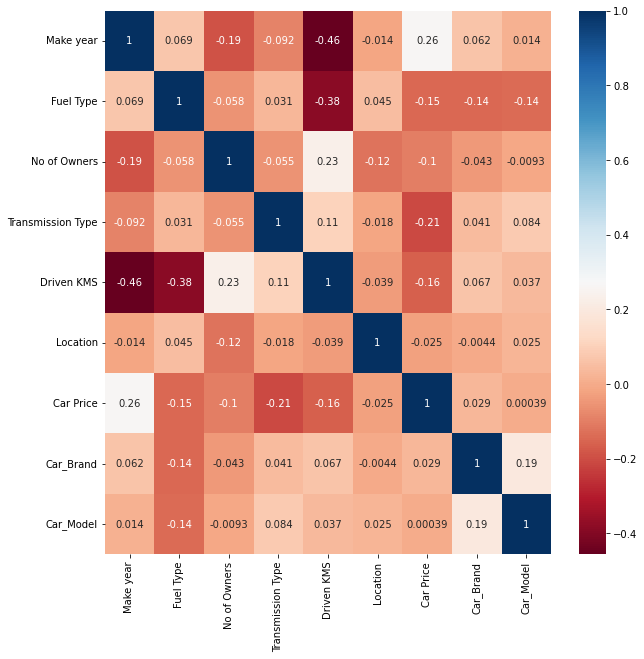

In [476]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

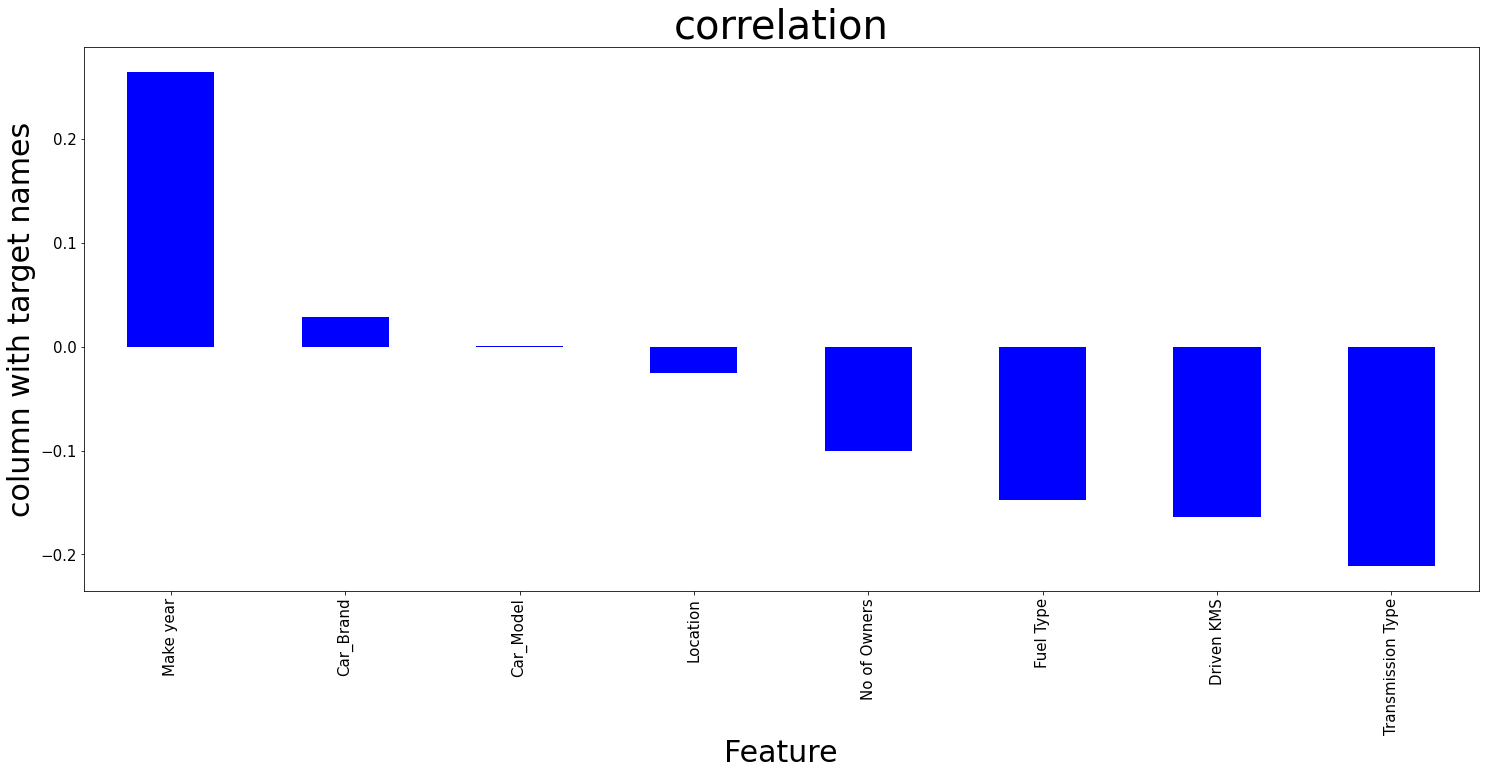

In [477]:
plt.figure(figsize=(25,10))
df.corr()['Car Price'].sort_values(ascending=False).drop(['Car Price']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

#### Standardization

In [478]:
x = df.drop(['Car Price'],axis=1)
y = df['Car Price']

In [479]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(x), columns=x.columns)

#### Using Variation inflation factor for checking multicollinearity

In [480]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_VIF(X):
    #Calculating VIF
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
    return vif
vif = calc_VIF(X)

In [481]:
vif

,Features,VIF
0,Make year,1.311160
1,Fuel Type,1.235585
2,No of Owners,1.094609
3,Transmission Type,1.037812
4,Driven KMS,1.561144
5,Location,1.020934
6,Car_Brand,1.065386
7,Car_Model,1.062308


- There is no multicollinearity problem

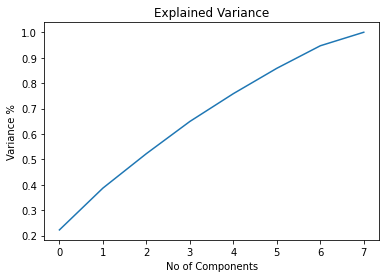

In [482]:
from sklearn.decomposition import PCA
pca = PCA()
principlecomponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

7 components explains about 95 % of data

In [483]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func=f_classif,k='all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['Feature','Score']
print(featurescores.nlargest(8,'Score'))

             Feature     Score
3  Transmission Type  2.974417
0          Make year  2.003112
1          Fuel Type  1.700206
5           Location  1.528535
4         Driven KMS  1.446898
7          Car_Model  1.225011
2       No of Owners  1.101417
6          Car_Brand  1.099961


#### Regression model building

In [487]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import joblib
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

#### Finding best random score

In [485]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.3757699755157149  on Random_state  170


In [488]:
models= [RandomForestRegressor(),DecisionTreeRegressor(),XGBRegressor(),Ridge(),SVR(),AdaBoostRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=maxRS)

def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,X,y,cv=4).mean()
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('_______________________________________________')
compare_models()


R2 score of the model :  RandomForestRegressor() = 36.6 %
mean squared error for model :  RandomForestRegressor() = 0.6171729800272039
cross val score for model :  RandomForestRegressor() = 0.2772447400118255
_______________________________________________
R2 score of the model :  DecisionTreeRegressor() = -22.5 %
mean squared error for model :  DecisionTreeRegressor() = 1.192520732459052
cross val score for model :  DecisionTreeRegressor() = -0.333026657598355
_______________________________________________
R2 score of the model :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, 

In [490]:
random_forest_params = {'n_estimators':[30,60,80],
                   'max_depth':[10,20,40],
                   'min_samples_leaf':[5,10,20],
                   'min_samples_split':[5,10],
                   'max_features':['auto','sqrt','log2'],
                   'criterion':['mse','mae']
    }
grid_classifier = GridSearchCV(RandomForestRegressor(),random_forest_params,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecat

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/an

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprec

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/akhilmatta/op

The best parameters are {'criterion': 'mse', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 80}
The best Score is 0.3039546560115201


In [498]:

Best_mod1 = RandomForestRegressor(criterion='mse',max_depth=20,max_features='auto',min_samples_leaf=5,min_samples_split=10,n_estimators=80)
Best_mod1.fit(x_train,y_train)
rfrpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfrpred)
print(acc*100)

/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/akhilmatta/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


35.56823125490086


#### Saving the model

In [499]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod1,"Car_Price.pkl")

['Car_Price.pkl']

#### Loading the model

In [500]:
# Loading the saved model
model=joblib.load("Car_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([-0.15014767,  0.08351762,  0.03224493, ...,  0.75252874,
       -0.53112937, -0.83138233])

In [501]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351
Predicted,-0.150148,0.083518,0.032245,0.737576,-0.151579,0.176082,-0.478191,0.181252,-0.392972,0.286104,...,-0.2086,-0.602395,1.160589,0.319794,-1.090128,0.464847,-0.349546,0.752529,-0.531129,-0.831382
Actual,1.481836,0.403407,0.190612,0.228366,-0.008218,0.355943,-0.125873,0.883778,-2.409014,1.154378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
